# This notebook can be used to produce Figs. 4(a) and (c)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

### import data and choose data to be plotted:

In [2]:
#df = pd.read_csv('SimDecTimeErrorRate_FreqMag_FreqCondNull.csv', header=None, skiprows=1)
choose_fcond = 1 # 0 or 1
if choose_fcond == 1:
    df = pd.read_csv('../DataGeneration/DataFiles/SimDecTimeErrorRate_ConstAbsFreqAbsMag_FreqCondEins.csv', header=None, skiprows=1)
elif choose_fcond == 0:
    df = pd.read_csv('../DataGeneration/DataFiles/SimDecTimeErrorRate_ConstAbsFreqAbsMag_FreqCondNull.csv', header=None, skiprows=1)
else:
    print('Choose either condition  0  or  1 !')
df[2] = df[2].fillna(15)
df[7] = df[7].fillna(15)
df=df[df[2]>0.01]
df=df[df[7]>0.01]
df=df[df[0]<6.0]
df=df[df[1]<6.0]

In [3]:
dfA=df[df[1]<0.34]
dfA=dfA[dfA[1]>0.33]
dfA
dfB=df[df[1]<0.67]
dfB=dfB[dfB[1]>0.66]
dfB
dfC=df[df[1]<1.01]
dfC=dfC[dfC[1]>0.99]
dfC
dfD=df[df[1]<1.99]
dfD=dfD[dfD[1]>2.01]
dfD
dfE=df[df[1]<3.01]
dfE=dfE[dfE[1]>2.99]
dfE
dfF=df[df[1]<4.01]
dfF=dfF[dfF[1]>3.99]
dfF

,0,1,2,3,4,5,6,7,8,9,10,11
27,0.041667,4.0,4.156339,2.410801,0.1525,0.8415,0.0060,2.611793,2.034479,0.1305,0.8670,0.0025
58,0.069519,4.0,4.124690,2.375802,0.1645,0.8295,0.0060,2.764243,2.206117,0.1620,0.8350,0.0030
89,0.098901,4.0,4.104022,2.374002,0.2005,0.7960,0.0035,2.800532,2.153596,0.1880,0.8085,0.0035
120,0.129944,4.0,4.049021,2.293669,0.2165,0.7780,0.0055,2.756615,2.147078,0.2295,0.7685,0.0020
151,0.162791,4.0,3.940763,2.258907,0.2745,0.7180,0.0075,2.823606,2.203783,0.2795,0.7160,0.0045
182,0.197605,4.0,3.994580,2.269154,0.3415,0.6560,0.0025,2.854173,2.369871,0.3270,0.6710,0.0020
213,0.234568,4.0,3.825641,2.089524,0.3735,0.6250,0.0015,2.854125,2.348368,0.3810,0.6165,0.0025
244,0.273885,4.0,3.611142,2.014841,0.4210,0.5780,0.0010,2.695391,2.224879,0.4220,0.5750,0.0030
275,0.315789,4.0,3.575252,2.002732,0.4605,0.5390,0.0005,2.634970,2.201075,0.4925,0.5065,0.0010
306,0.360544,4.0,3.325525,1.787383,0.5545,0.4455,0.0000,2.459670,2.070441,0.5550,0.4440,0.0010


In [33]:
#df[:2208]
#df[0:60]
df[700:720]
df[245:277]
dfA=df[df[0]<0.97]
dfA=dfA[dfA[0]>0.96]
dfA
df[750:800]

,0,1,2,3,4,5,6,7,8,9,10,11
775,1.985075,0.142857,1.446481,0.538114,0.0445,0.9555,0.0,1.010053,0.854247,0.0870,0.9130,0.0
776,1.985075,0.176471,1.462013,0.557044,0.1055,0.8945,0.0,1.067770,0.897653,0.1400,0.8600,0.0
777,1.985075,0.212121,1.489618,0.549561,0.1415,0.8585,0.0,1.158815,1.034752,0.1945,0.8055,0.0
778,1.985075,0.250000,1.477372,0.533942,0.2060,0.7940,0.0,1.211671,1.029988,0.2420,0.7580,0.0
779,1.985075,0.290323,1.489386,0.533488,0.3020,0.6980,0.0,1.185280,0.998856,0.3110,0.6890,0.0
780,1.985075,0.333333,1.473296,0.528233,0.3545,0.6455,0.0,1.228063,1.066906,0.3680,0.6320,0.0
781,1.985075,0.379310,1.462576,0.491025,0.4040,0.5960,0.0,1.292179,1.093862,0.4330,0.5670,0.0
782,1.985075,0.428571,1.429722,0.461462,0.4925,0.5075,0.0,1.224009,1.013928,0.4805,0.5195,0.0
783,1.985075,0.481481,1.379016,0.444587,0.5840,0.4160,0.0,1.245940,1.058300,0.5540,0.4460,0.0
784,1.985075,0.538462,1.371842,0.428027,0.6470,0.3530,0.0,1.121546,0.940338,0.6080,0.3920,0.0


### Produce part of Fig. 4, i.e. Figs. 4(a) and (c)

<IPython.core.display.Javascript object>


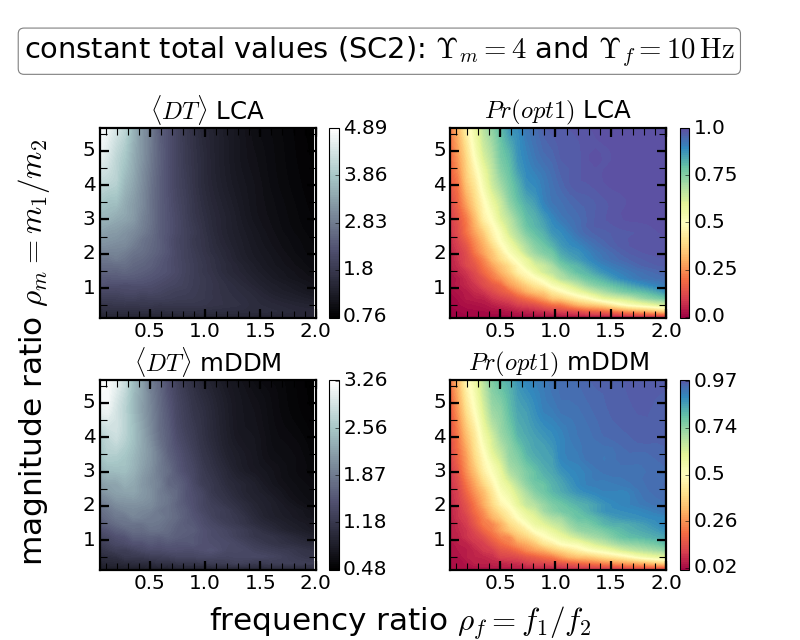

min mDDM 0.4
max mDDM 3.45
min LCA 0.55
max LCA 5.5


In [35]:
fig = plt.figure(figsize=(10, 8))
#fig, axs = plt.subplots(nrows=2, ncols=2) #sharey=True,
#ax1 = axs[0, 0]
#ax2 = axs[0, 1]
#ax3 = axs[1, 0]
#ax4 = axs[1, 1]

VMIN_prob = 0
VMAX_prob = 1
#VMIN_DT = 0.35
#VMAX_DT = 2.25

VMIN_DT_mddm = 0.4 #np.min(df[7]) #0.4
print('min mDDM', VMIN_DT_mddm)
VMAX_DT_mddm = 3.45 #np.max(df[7]) #3.45
print('max mDDM', VMAX_DT_mddm)
VMIN_DT_lca = 0.55 #np.min(df[2]) #0.55
print('min LCA', VMIN_DT_lca)
VMAX_DT_lca = 5.5 #np.max(df[2]) #5.5
print('max LCA', VMAX_DT_lca)

nr_row = 2#3
nr_col = 2

freq_data = df[0] #10.0*(df[0]-1.0)/(1.0+df[0])
mag_data = df[1] #4.0*(df[1]-1.0)/(1.0+df[1]) 
DT_cross_data = df[2]
Opt1_cross_data = df[4]
DT_mddm_data = df[7]
Opt1_mddm_data = df[9]
'''
freq_data = df[0][0:2208]
mag_data = df[1][0:2208]
DT_cross_data = df[2][0:2208]
Opt1_cross_data = df[4][0:2208]
DT_mddm_data = df[7][0:2208]
Opt1_mddm_data = df[9][0:2208]
'''
if choose_fcond == 1:
    xi_val = np.linspace(min(freq_data),max(freq_data),26) #26
else:
    xi_val = np.linspace(min(freq_data),max(freq_data),33) #26
    
yi_val = np.linspace(min(mag_data),max(mag_data),30) 


zi_val =  griddata( (freq_data, mag_data), DT_cross_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
#norm = mpl.colors.Normalize(vmin=VMIN_DT_lca, vmax=VMAX_DT_lca)
CS = ax1.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.bone)#, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax1)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val))) #abs(float(np.min(zi_val[zi_val>0.01])))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax1.set_title(r'(a) $\langle DT\rangle$ LCA', fontsize=22, y=1.02)
ax1.set_title(r'$\langle DT\rangle$ LCA', fontsize=22, y=1.02)


zi_val =  griddata( (freq_data, mag_data), Opt1_cross_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
zi_val[zi_val > 1] = 1
zi_val[zi_val < 0] = 0
ax2 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1)
norm = mpl.colors.Normalize(vmin=VMIN_prob, vmax=VMAX_prob)
CS = ax2.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.Spectral, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax2)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val)))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax2.set_title(r'(b) $Pr(opt1)$ LCA', fontsize=22, y=1.02)
ax2.set_title(r'$Pr(opt1)$ LCA', fontsize=22, y=1.02)

zi_val =  griddata( (freq_data, mag_data), DT_mddm_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
ax3 = plt.subplot2grid((nr_row, nr_col), (1, 0), colspan=1)
#norm = mpl.colors.Normalize(vmin=VMIN_DT_mddm, vmax=VMAX_DT_mddm)
CS = ax3.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.bone)#, norm=norm)
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax3)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = abs(float(np.min(zi_val[zi_val>0.01])))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax3.set_title(r'(c) $\langle DT\rangle$ mDDM', fontsize=22, y=1.02)
ax3.set_title(r'$\langle DT\rangle$ mDDM', fontsize=22, y=1.02)


zi_val =  griddata( (freq_data, mag_data), Opt1_mddm_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 
zi_val[zi_val > 1] = 1
zi_val[zi_val < 0] = 0
ax4 = plt.subplot2grid((nr_row, nr_col), (1, 1), colspan=1)
norm = mpl.colors.Normalize(vmin=VMIN_prob, vmax=VMAX_prob)
CS = ax4.contourf(xi_val,yi_val,zi_val,100,cmap=plt.cm.Spectral, norm=norm) #BuPu #YlGnBu
cbar = fig.colorbar(CS, orientation='vertical',shrink=1.0, ax=ax4)
cbar.ax.tick_params(labelsize=18) 
#cbar.set_label(r'mean decision time $\langle DT\rangle$', fontsize=26, labelpad=10)
#lowlim = np.min(zi_val)/np.max(zi_val);
#cbar.set_clim(0.25, 0.75)
lowlim = abs(float(np.min(zi_val)))
uplim = float(np.max(zi_val))
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
#cbar.set_ticklabels([lowlim, mid1, mid2, mid3, uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#ax4.set_title(r'(d) $Pr(opt1)$ mDDM', fontsize=22, y=1.02)
ax4.set_title(r'$Pr(opt1)$ mDDM', fontsize=22, y=1.02)

for ax in [ax1,ax2,ax3,ax4]:
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=18)
    plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=18)
    #plt.xlim(0.1,2)
    if choose_fcond == 1:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    else:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim(0.05,np.max(xi_val))
    if choose_fcond == 1:
        ax.set_xlim(0.05,2)
    else:    
        ax.set_xlim(0.05,np.max(xi_val))
    #ax.set_ylim(-3,3)
    
    '''
    if ax == ax1 or ax==ax3:
        ax.plot([4/3,4/3,4/3,1,1,1,3/4,3/4,3/4], [4/3,1,3/4,4/3,1,3/4,4/3,1,3/4], 'o', color='orange', ms=8,
               markeredgewidth=2, markeredgecolor='orange', fillstyle='none')
        ax.plot([0.1,2],[4/3,4/3], lw=1.5, c='orange', ls ='--')
        ax.plot([0.1,2],[3/4,3/4], lw=1.5, c='orange', ls ='--')
        ax.plot([0.1,2],[1,1], lw=1.5, c='orange', ls ='--')
        ax.plot([4/3,4/3],[0.25,2.5], lw=1.5, c='orange', ls ='--')
        ax.plot([1,1],[0.25,2.5], lw=1.5, c='orange', ls ='--')
        ax.plot([3/4,3/4],[0.25,2.5], lw=1.5, c='orange', ls ='--')
    else:
        ax.plot([4/3,4/3,4/3,1,1,1,3/4,3/4,3/4], [4/3,1,3/4,4/3,1,3/4,4/3,1,3/4], 'o', color='b', ms=8,
               markeredgewidth=2, markeredgecolor='b', fillstyle='none')
        ax.plot([0.1,2],[4/3,4/3], lw=1.5, c='b', ls ='--')
        ax.plot([0.1,2],[3/4,3/4], lw=1.5, c='b', ls ='--')
        ax.plot([0.1,2],[1,1], lw=1.5, c='b', ls ='--')
        ax.plot([4/3,4/3],[0.25,2.5], lw=1.5, c='b', ls ='--')
        ax.plot([1,1],[0.25,2.5], lw=1.5, c='b', ls ='--')
        ax.plot([3/4,3/4],[0.25,2.5], lw=1.5, c='b', ls ='--')
    '''

fig.subplots_adjust(hspace=0.33)
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(bottom=0.11)
fig.subplots_adjust(top=0.8)

fig.text(0.5, 0.015, r'frequency ratio $\rho_f=f_1/f_2$', ha='center', fontsize=28)
fig.text(0.02, 0.45, r'magnitude ratio $\rho_m=m_1/m_2$', va='center', rotation='vertical', fontsize=28)
if choose_fcond == 1:
    fig.text(0.03, 0.92, r'constant total values (SC2): $\Upsilon_m=4$ and $\Upsilon_f=10\,\mathrm{Hz}$', va='center', fontsize=26,
            bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))
else:
    fig.text(0.03, 0.92, r'constant total values (SC1): $\Upsilon_m=4$ and $\Upsilon_f=10\,\mathrm{Hz}$', va='center', fontsize=26,
        bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.2'))

#fig.set_tight_layout(True)

In [36]:
#fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_constMagn_June2018.png', format='png', dpi=150)
#fig.savefig('Fig_2D_MagFreq_fCond_' + str(choose_fcond) +'_constMagn_Jan2019.png', format='png', dpi=150)

### Further visualisation

In [78]:
dfA=df[df[1]<0.34]
dfA=dfA[dfA[1]>0.33]
dfA
dfB=df[df[1]<0.67]
dfB=dfB[dfB[1]>0.66]
dfB
dfC=df[df[1]<1.01]
dfC=dfC[dfC[1]>0.99]
dfC
dfD=df[df[1]<2.08]
dfD=dfD[dfD[1]>2.07]
dfD
dfE=df[df[1]<3.01]
dfE=dfE[dfE[1]>2.99]
dfE
dfF=df[df[1]<4.01]
dfF=dfF[dfF[1]>3.99]
dfF

rhof = {'dfA': dfA[0], 'dfB': dfB[0], 'dfC': dfC[0], 'dfD': dfD[0], 'dfE': dfE[0], 'dfF': dfF[0]}
DTci = {'dfA': dfA[2], 'dfB': dfB[2], 'dfC': dfC[2], 'dfD': dfD[2], 'dfE': dfE[2], 'dfF': dfF[2]}
DTmd = {'dfA': dfA[7], 'dfB': dfB[7], 'dfC': dfC[7], 'dfD': dfD[7], 'dfE': dfE[7], 'dfF': dfF[7]}
PRci = {'dfA': dfA[4], 'dfB': dfB[4], 'dfC': dfC[4], 'dfD': dfD[4], 'dfE': dfE[4], 'dfF': dfF[4]}
PRmd = {'dfA': dfA[9], 'dfB': dfB[9], 'dfC': dfC[9], 'dfD': dfD[9], 'dfE': dfE[9], 'dfF': dfF[9]}

<IPython.core.display.Javascript object>


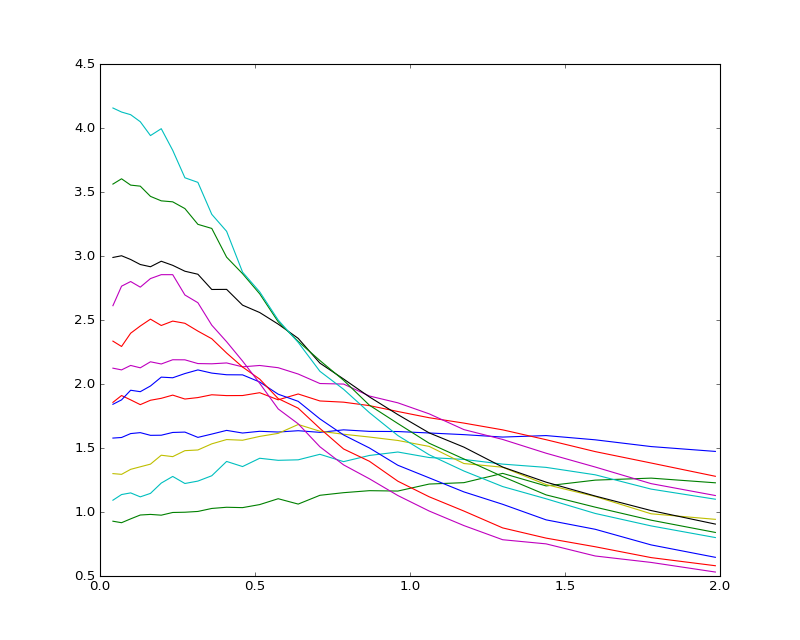

In [83]:
figA = plt.figure(figsize=(10, 8))
for ID in ['dfA', 'dfB', 'dfC', 'dfD', 'dfE', 'dfF']:
    plt.plot(rhof[ID],DTci[ID])
    plt.plot(rhof[ID],DTmd[ID])
    plt.xlim(0,2)
    

<IPython.core.display.Javascript object>


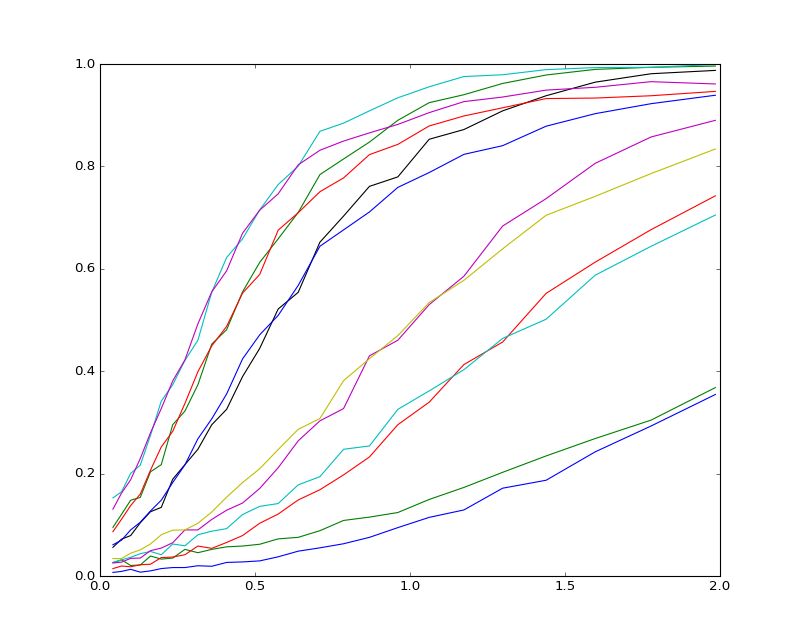

In [84]:
figB = plt.figure(figsize=(10, 8))
for ID in ['dfA', 'dfB', 'dfC', 'dfD', 'dfE', 'dfF']:
    plt.plot(rhof[ID],PRci[ID])
    plt.plot(rhof[ID],PRmd[ID])
    plt.xlim(0,2)